# Introdução  
Em 2018 a OMS incluiu os movimentos antivacina como um dos 10 maiores desafios para 2019, as pessoas estão deixando de se vacinar por diversos motivos, muito oriundos a _fake news_, então a proposta deste relatorio é levantar os dados de cobertura vacinal, com foco nas vacinas iniciais da vida, compará-los aos dados de pesquisa sobre o termo antivacina do google, os nascimentos e o orçamento do SUS, para compreender se esses fatores estão relacionados. É importante lembrar que não vacinação pode ter varias consequencias a medio e longo prazo, não somente individualmente mas tambem à terceiros que dependem da imunidade de rebanho pois tem alguma limitação para tomar a vaccina.


# Resumo
Foi analisado os dados das coberturas vacinais de 2014 à 2019(mais recente disponivel) em comparação com dados de nascimentos 2014 a 2018 com extrapolação para 2019, orçamento do sus e relevancia de pesquisas do google sobre anti vacinas. Para ter um relatorio mais limpo a construção dos gráficos foi feita atravez de funçoes e a preparação das bases feitas separadamente, deixando assim a parte de analise com pouco código. Durante a analise foram levantadas algumas hipoteses do porque a cobertura vacinal caiu tanto algumas não foram confirmadas concluindo-se então que o principalm motivo é a ascenção dos grupos anti vacina.

# Código e tratamento dos dados

## Bibliotecas e configurações

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from jupyterthemes import jtplot
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from IPython.core.display import display, HTML

In [94]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
display(HTML("<style>.container { width:80% !important; }</style>"))

## Fonte de Dados

In [95]:
imunizacao_2019 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2019.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2018 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2018.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2017 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2017.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2016 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2016.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2015 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2015.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2014 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2014.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")

nascimentos = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/nascimentos_2014_a_2018.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=12,thousands=".", decimal=",")

C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
C:\Users\r9kx\Anaconda3\lib\site-packag

In [96]:
g_antivacinas = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/google-antivacina.csv'
                           ,skiprows =2)
                             

## Funções

In [97]:
regioes = ['Região Norte','Região Nordeste','Região Sudeste','Região Sul','Região Centro-Oeste']

def lineplot(dataset,colunas,titulo):
    plt.figure(figsize=(12,8))
    plt.grid(True)
    ax=sns.lineplot(data=dataset[colunas], linewidth = 2.5)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))
    plt.ylim((0,120))
    plt.legend()
    plt.title(titulo,fontsize=16,pad=10,fontweight="bold")

    plt.show()
    
def compara_pesquisa_total():
    x= mdates.date2num(g_antivacinas.T.index)
    y=g_antivacinas.T['antivacina: (Brazil)']
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)

    plt.figure(figsize=(12,8))
    sns.scatterplot(data=g_antivacinas.T.reset_index(),y='antivacina: (Brazil)',x='Month',
                    label='Relevancia pesquisas Antivacina',marker='o')
    plt.plot(x, p(x), "r--",label='Tendencia pesquisas Antivacina')
    ax=sns.lineplot(data=imuno_bcg['Total'],label="Cobertura Vacinal BCG",linewidth = 2.5)
    sns.lineplot(data=imuno_hepatiteb['Total'],label="Cobertura Vacinal Hepatite B",linewidth = 2.5)
    loc = ticker.LinearLocator(numticks=10)
    ax.xaxis.set_major_locator(loc)
    plt.ylim((-1,120))
    plt.title('Comparativo de relevancia das pesquisas antivacina do google com as coberturas vacinais de Hepatite B e BCG', fontsize=16, pad =20)
    plt.xlabel('Data',fontsize=12)
    plt.ylabel('')
    plt.grid()
    plt.legend()
    plt.show()
    
def lineplot_nascimentos(dataset,colunas,titulo):
    plt.figure(figsize=(12,8))
    plt.grid(axis='y',color='w')
    ax=sns.lineplot(data=dataset[colunas], linewidth = 3)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    plt.legend(bbox_to_anchor=(1.05,1.0))
    plt.title(titulo,fontsize=16,pad=10,fontweight="bold")
    plt.show()
    
def to_datetime_(dataframe):
    dataframe.index = dataframe.index.map(dicionario_ano)
    dataframe.index = pd.to_datetime(dataframe.index)
    return dataframe

def barplot_polioetriplice():
    plt.figure(figsize=(16,16))
    plt.subplot(2,1,1)
    ax=sns.barplot(x='variable', y='value', hue='Região/Unidade da Federação', data=tríplice_viral[regioes].T.reset_index().melt(id_vars=['Região/Unidade da Federação']),palette='magma')
    plt.grid(color='gray')
    plt.legend(bbox_to_anchor=(1.2,1.0))
    plt.title('Triplice Viral',fontsize=14,pad=15)
    plt.suptitle('Cobertura Vacinal de Triplice Viral e Poliomelite de 2014 a 2019',fontsize=20)
    plt.xlabel('')
    plt.ylabel('Cobertura Vacinal')
    plt.subplot(2,1,2)
    plt.title('Poliomelite',fontsize=14,pad=15)
    sns.barplot(x='variable', y='value', hue="Região/Unidade da Federação", data=poliomielite[regioes].T.reset_index().melt(id_vars=['Região/Unidade da Federação']),palette='magma')
    plt.grid(color='gray')
    plt.xlabel('')
    plt.ylabel('Cobertura Vacinal')
    plt.legend('')
    plt.show()
    
def compara_pesquisa_total_plus():
    x= mdates.date2num(g_antivacinas.T.index)
    y=g_antivacinas.T['antivacina: (Brazil)']
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    
    polio = to_datetime_(poliomielite)
    triplice= to_datetime_(tríplice_viral)

    plt.figure(figsize=(18,14))
    sns.scatterplot(data=g_antivacinas.T.reset_index(),y='antivacina: (Brazil)',x='Month',
    label='Relevancia pesquisas Antivacina',marker='o')
    
    plt.plot(x, p(x), "r--",label='Tendencia pesquisas Antivacina')
    
    ax=sns.lineplot(data=imuno_bcg['Total'],label="Cobertura Vacinal BCG",linewidth = 2.5)
    
    sns.lineplot(data=imuno_hepatiteb['Total'],label="Cobertura Vacinal Hepatite B",linewidth = 2.5)
    
    sns.lineplot(data=poliomielite['Total'],label="Cobertura Vacinal Poliomelite",linewidth = 2.5)

    sns.lineplot(data=tríplice_viral['Total'],label="Cobertura Vacinal Triplice Viral",linewidth = 2.5)
    
    loc = ticker.LinearLocator(numticks=10)
    ax.xaxis.set_major_locator(loc)
    plt.ylim((-1,120))
    plt.title('Comparativo Relevancia das pesquisas Antivacina no Google com a Cobertura Vacinal', fontsize=24, pad =25,fontweight="bold")
    plt.xlabel('Data',fontsize=12)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))
    plt.ylabel('')
    plt.grid()
    plt.legend(bbox_to_anchor=(1.25,1.0))
    plt.show()
    

## Preparando Bases

Nascimentos

In [98]:
nascimentos.set_index('Região/Unidade da Federação',inplace=True)
nascimentos.drop(columns='Total',inplace=True)

Como não há base para 2019, inclui a diferença media aos valores de 2018 para estimar os nascimentos

In [99]:
nascimentos['2019']= nascimentos['2018'] + round(nascimentos[['2014','2015','2016','2017','2018']].diff(axis=1).mean(axis=1),0)

### Bases de Vacinas que se tomam ao nascer

Hepatite B até 30 dias

In [100]:
imuno_hepatiteb = pd.DataFrame()
imuno_hepatiteb['Região/Unidade da Federação'] = imunizacao_2014['Região/Unidade da Federação']
imuno_hepatiteb['2014'] = imunizacao_2014['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2015'] = imunizacao_2015['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2016'] = imunizacao_2016['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2017'] = imunizacao_2017['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2018'] = imunizacao_2018['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2019'] = imunizacao_2019['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb.set_index('Região/Unidade da Federação',inplace=True)
imuno_hepatiteb = imuno_hepatiteb.T

BCG

In [101]:
imuno_bcg = pd.DataFrame()
imuno_bcg['Região/Unidade da Federação'] = imunizacao_2014['Região/Unidade da Federação']
imuno_bcg['2014'] = imunizacao_2014['072 BCG']
imuno_bcg['2015'] = imunizacao_2015['072 BCG']
imuno_bcg['2016'] = imunizacao_2016['072 BCG']
imuno_bcg['2017'] = imunizacao_2017['072 BCG']
imuno_bcg['2018'] = imunizacao_2018['072 BCG']
imuno_bcg['2019'] = imunizacao_2019['072 BCG']
imuno_bcg.set_index('Região/Unidade da Federação',inplace=True)
imuno_bcg = imuno_bcg.T

### Vacinas Poliomielite e Tríplice Viral

Vacinas que se tomam até um ano de idade.

In [102]:
poliomielite = pd.DataFrame()
poliomielite['Região/Unidade da Federação'] = imunizacao_2014['Região/Unidade da Federação']
poliomielite['2014'] = imunizacao_2014['074 Poliomielite']
poliomielite['2015'] = imunizacao_2015['074 Poliomielite']
poliomielite['2016'] = imunizacao_2016['074 Poliomielite']
poliomielite['2017'] = imunizacao_2017['074 Poliomielite']
poliomielite['2018'] = imunizacao_2018['074 Poliomielite']
poliomielite['2019'] = imunizacao_2019['074 Poliomielite']
poliomielite.set_index('Região/Unidade da Federação',inplace=True)
poliomielite = poliomielite.T

tríplice_viral = pd.DataFrame()
tríplice_viral['Região/Unidade da Federação'] = imunizacao_2014['Região/Unidade da Federação']
tríplice_viral['2014'] = imunizacao_2014['021 Tríplice Viral  D1']
tríplice_viral['2015'] = imunizacao_2015['021 Tríplice Viral  D1']
tríplice_viral['2016'] = imunizacao_2016['021 Tríplice Viral  D1']
tríplice_viral['2017'] = imunizacao_2017['021 Tríplice Viral  D1']
tríplice_viral['2018'] = imunizacao_2018['021 Tríplice Viral  D1']
tríplice_viral['2019'] = imunizacao_2019['021 Tríplice Viral  D1']
tríplice_viral.set_index('Região/Unidade da Federação',inplace=True)
tríplice_viral = tríplice_viral.T

### Bases do google

In [103]:
g_antivacinas.set_index('Month',inplace=True)
g_antivacinas.index = pd.to_datetime(g_antivacinas.index)
g_antivacinas = g_antivacinas.T

### Aplicando datetime

In [104]:
dicionario_ano = {'2019':'2019-12-01','2018':'2018-12-01','2017':'2017-12-01','2016':'2016-12-01',
                  '2015':'2015-12-01','2014':'2014-12-01'}
imuno_bcg.index = imuno_bcg.index.map(dicionario_ano)
imuno_hepatiteb.index = imuno_hepatiteb.index.map(dicionario_ano)

nascimentos = nascimentos.T
nascimentos.index = nascimentos.index.map(dicionario_ano)


In [105]:
imuno_bcg.index = pd.to_datetime(imuno_bcg.index)
imuno_hepatiteb.index = pd.to_datetime(imuno_hepatiteb.index)
g_antivacinas.T.index = pd.to_datetime(g_antivacinas.T.index)
nascimentos.index = pd.to_datetime(nascimentos.index)

# Análise dos dados:

Iniciamos vendo como foi a evolução da cobertura Vacinal de BCG e Hepatite B no total. 

No handles with labels found to put in legend.


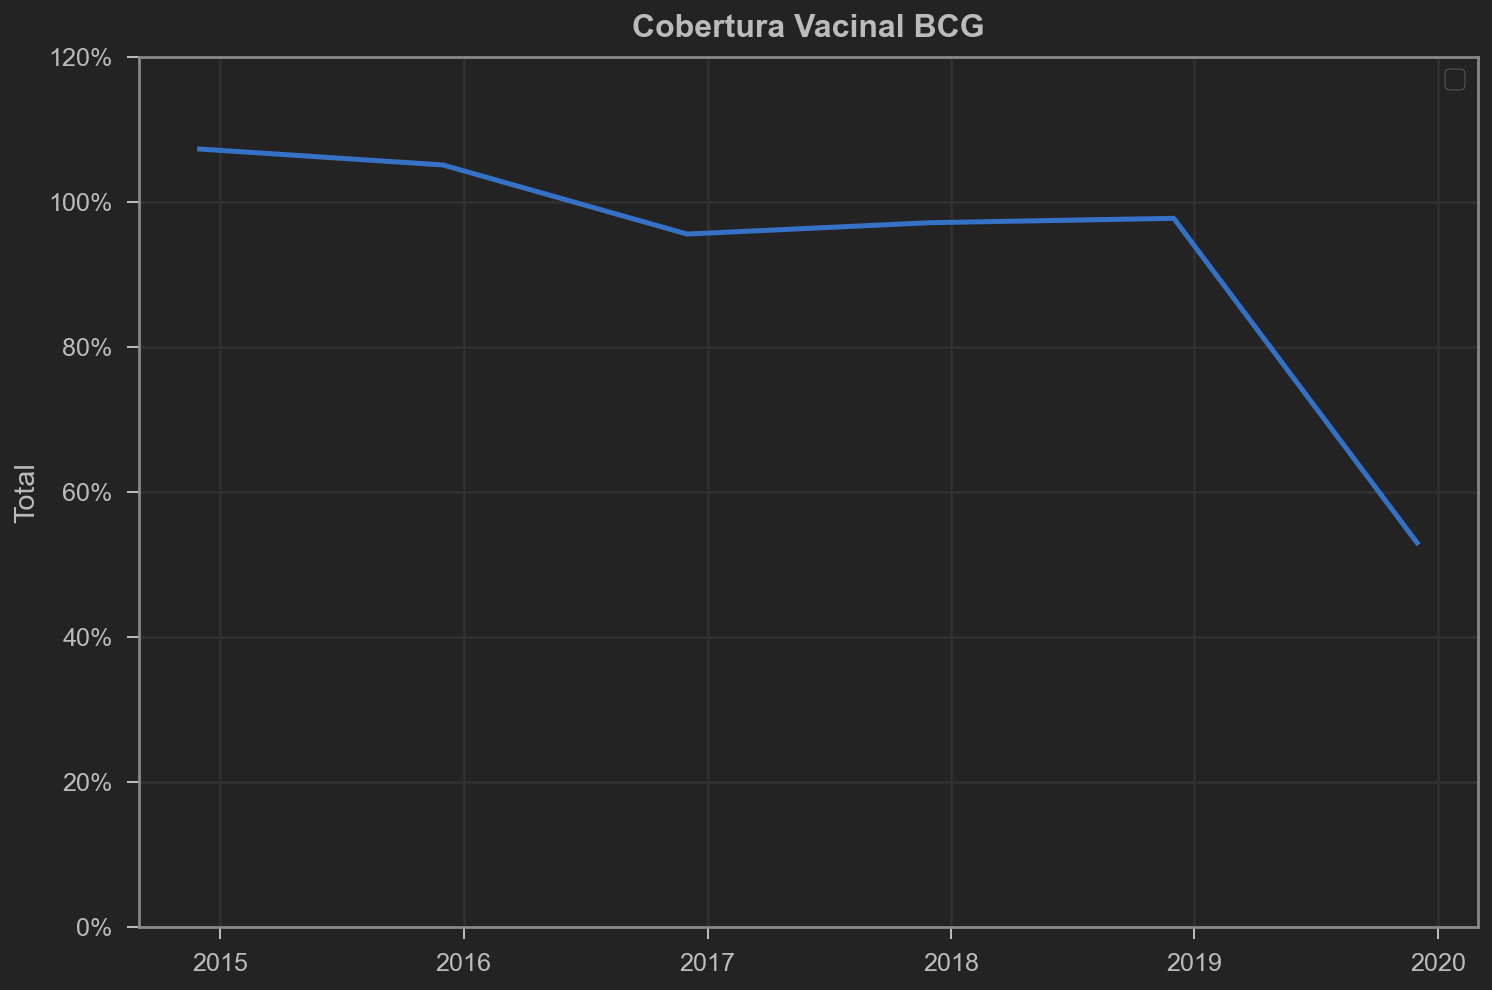

No handles with labels found to put in legend.


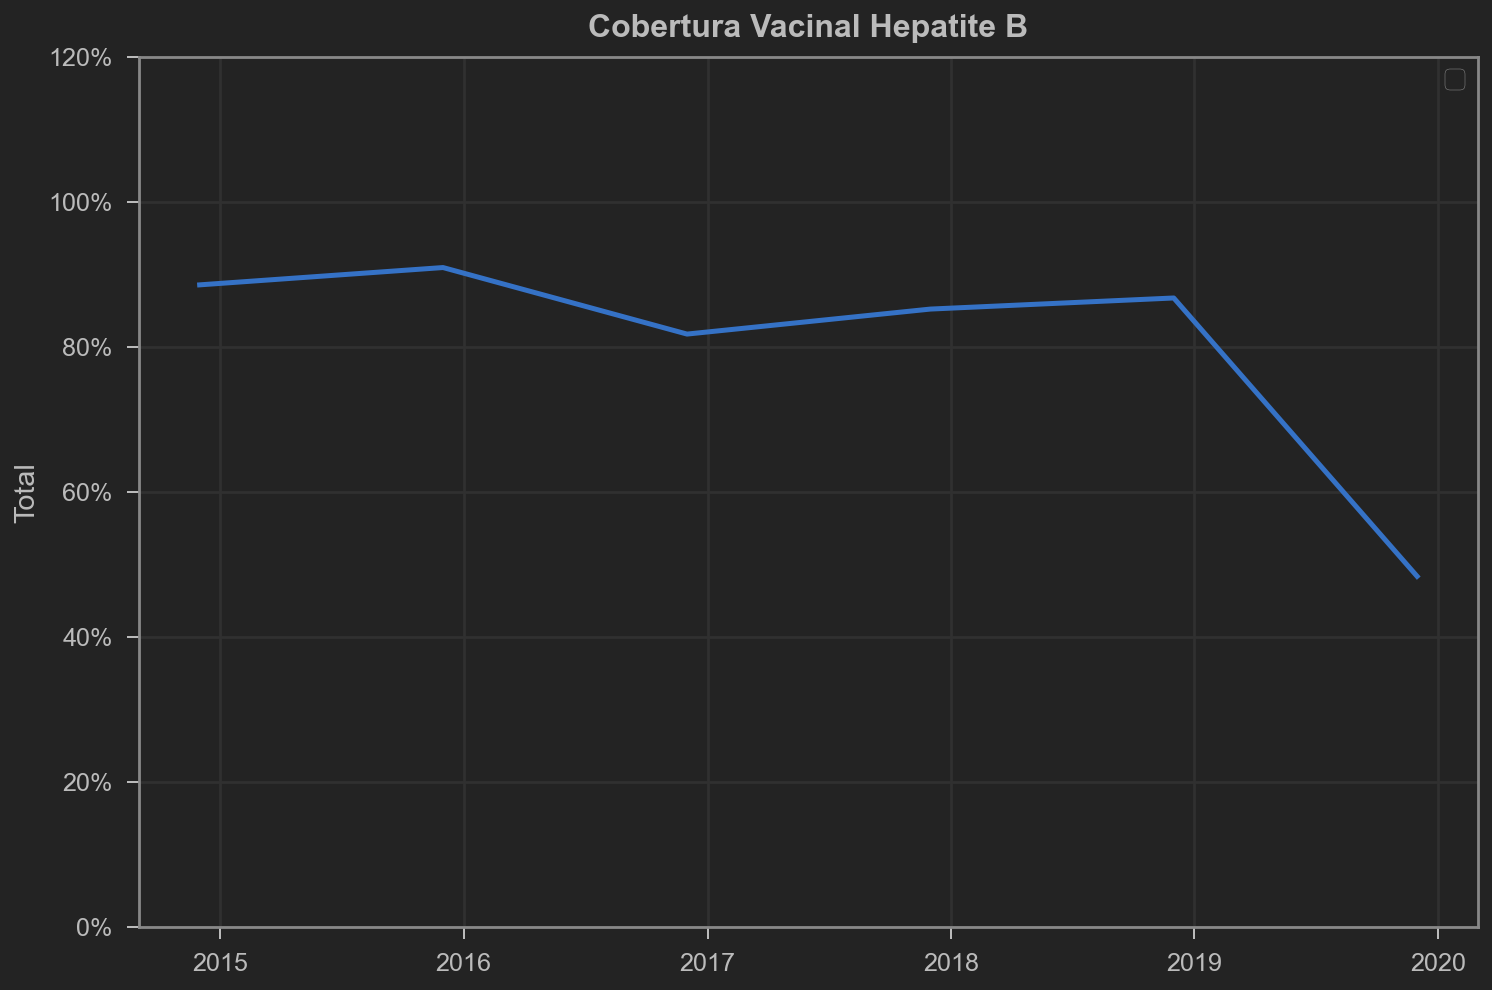

In [106]:
lineplot(imuno_bcg,'Total','Cobertura Vacinal BCG')
lineplot(imuno_hepatiteb,'Total','Cobertura Vacinal Hepatite B')

Notável uma queda expressiva para ambas as vacinas em 2019, mas será que isso foi ocasionado por uma região especifica?

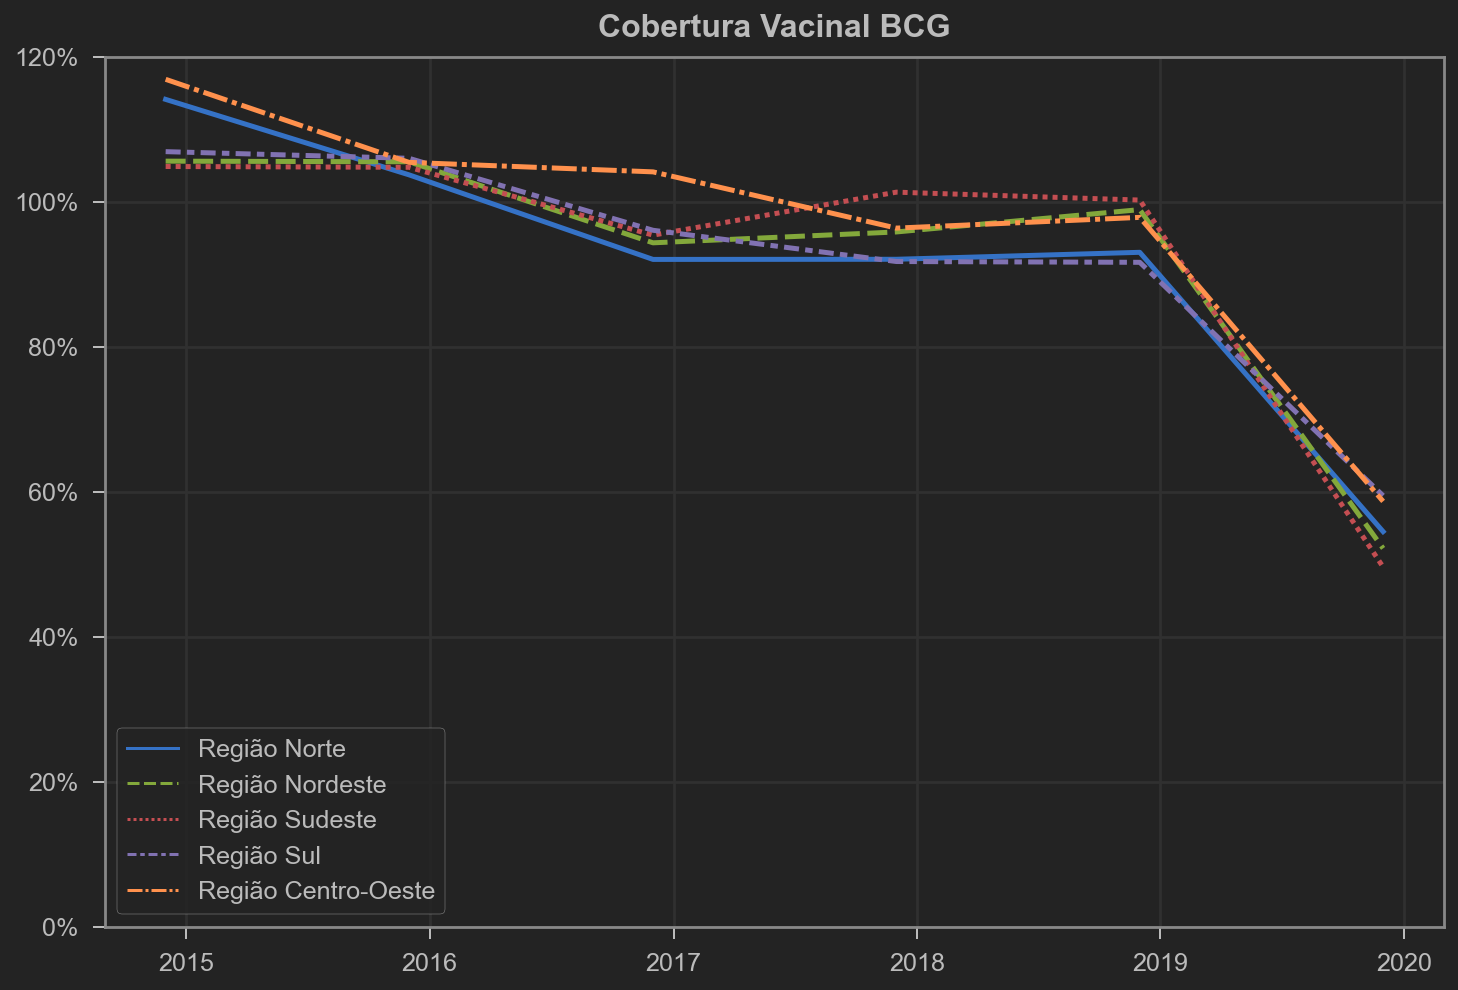

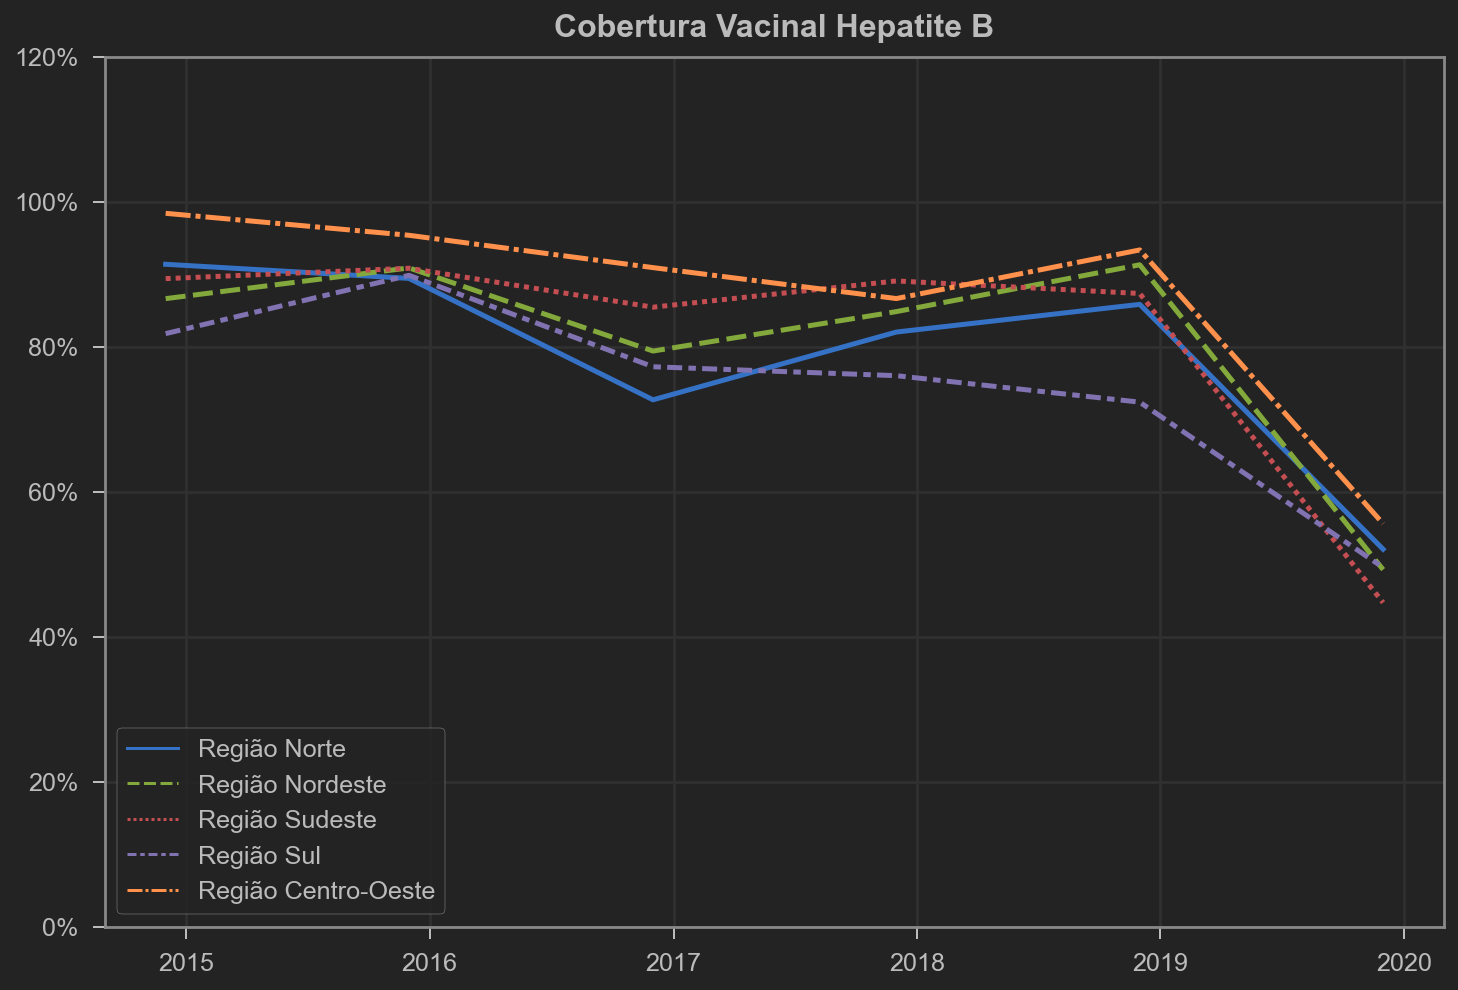

In [107]:
lineplot(imuno_bcg,regioes,'Cobertura Vacinal BCG')
lineplot(imuno_hepatiteb,regioes,'Cobertura Vacinal Hepatite B')

Apesar de ter algumas diferenças entre as regiões, o comportamente segue o mesmo padrão.  
A hipótese é que os grupos antivacinas conseguiram uma expressividade muito grande ao longo desses anos conseguindo assim convencer as novas mães a não vacinarem seus filhos.

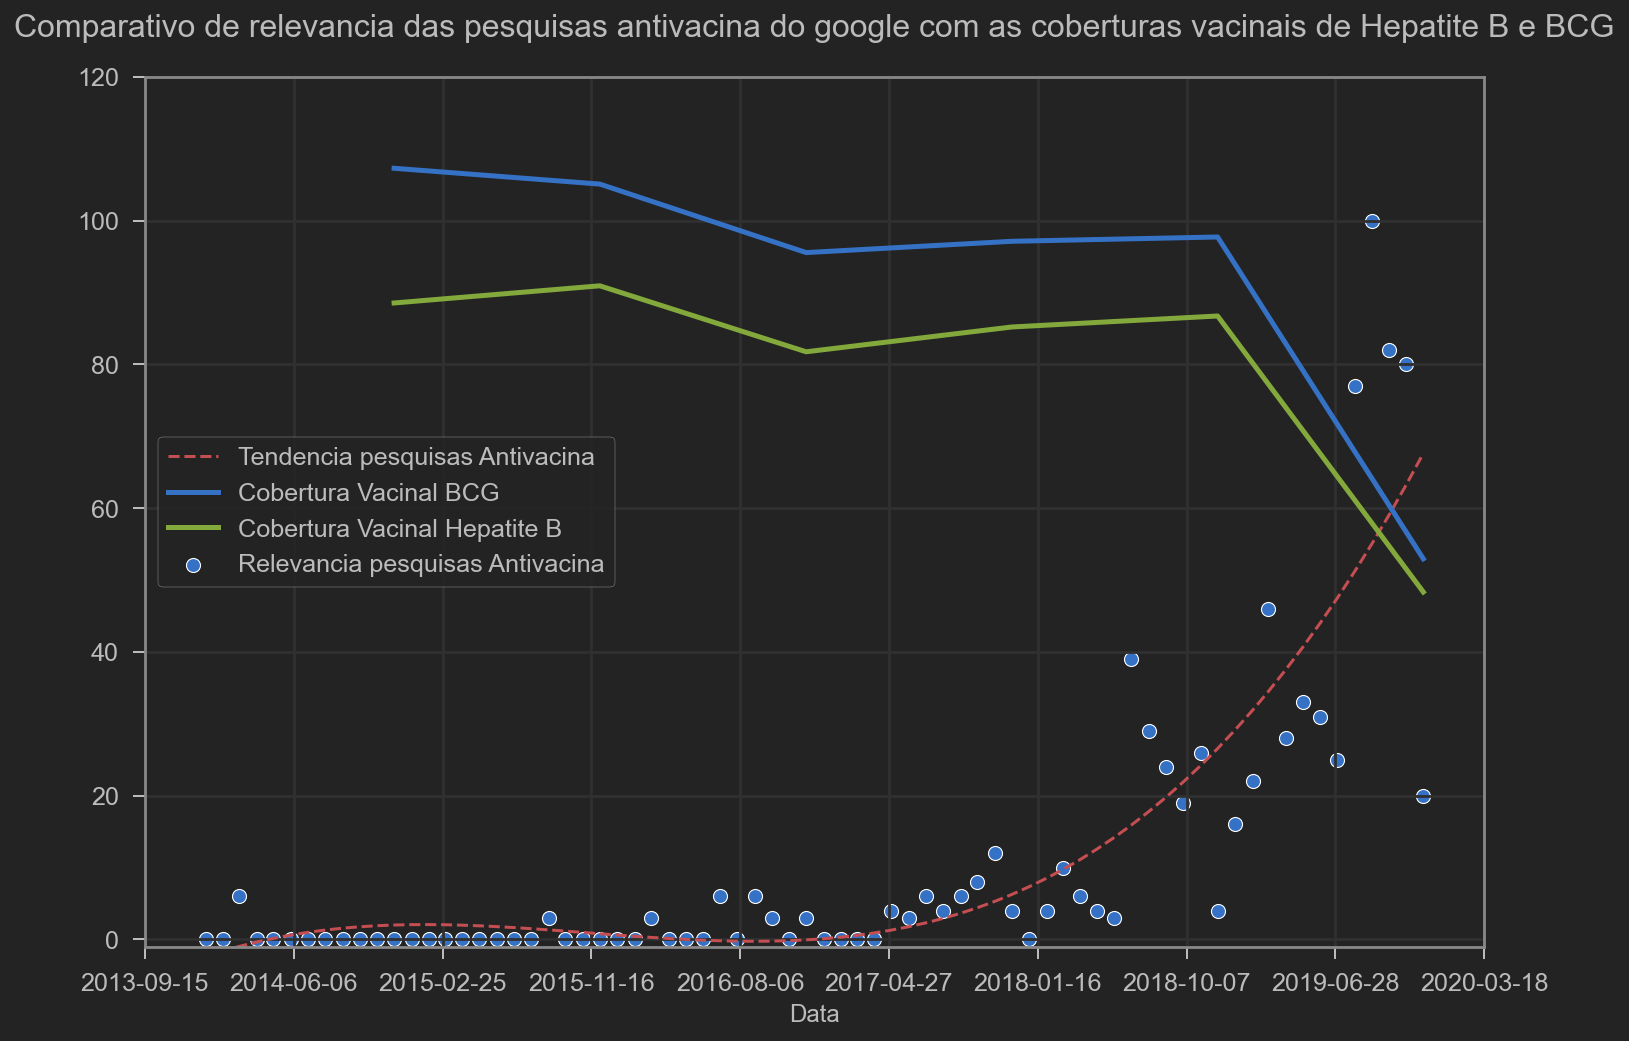

In [108]:
compara_pesquisa_total()

É inegavel a influência da relevancia dos grupos anti-vacina com uma queda brutal nas vacinações dos recem nascidos. Contudo é possivel que o numero de nascimentos tenha subido muito e o governo não conseguiu fornecer as doses adequadas.

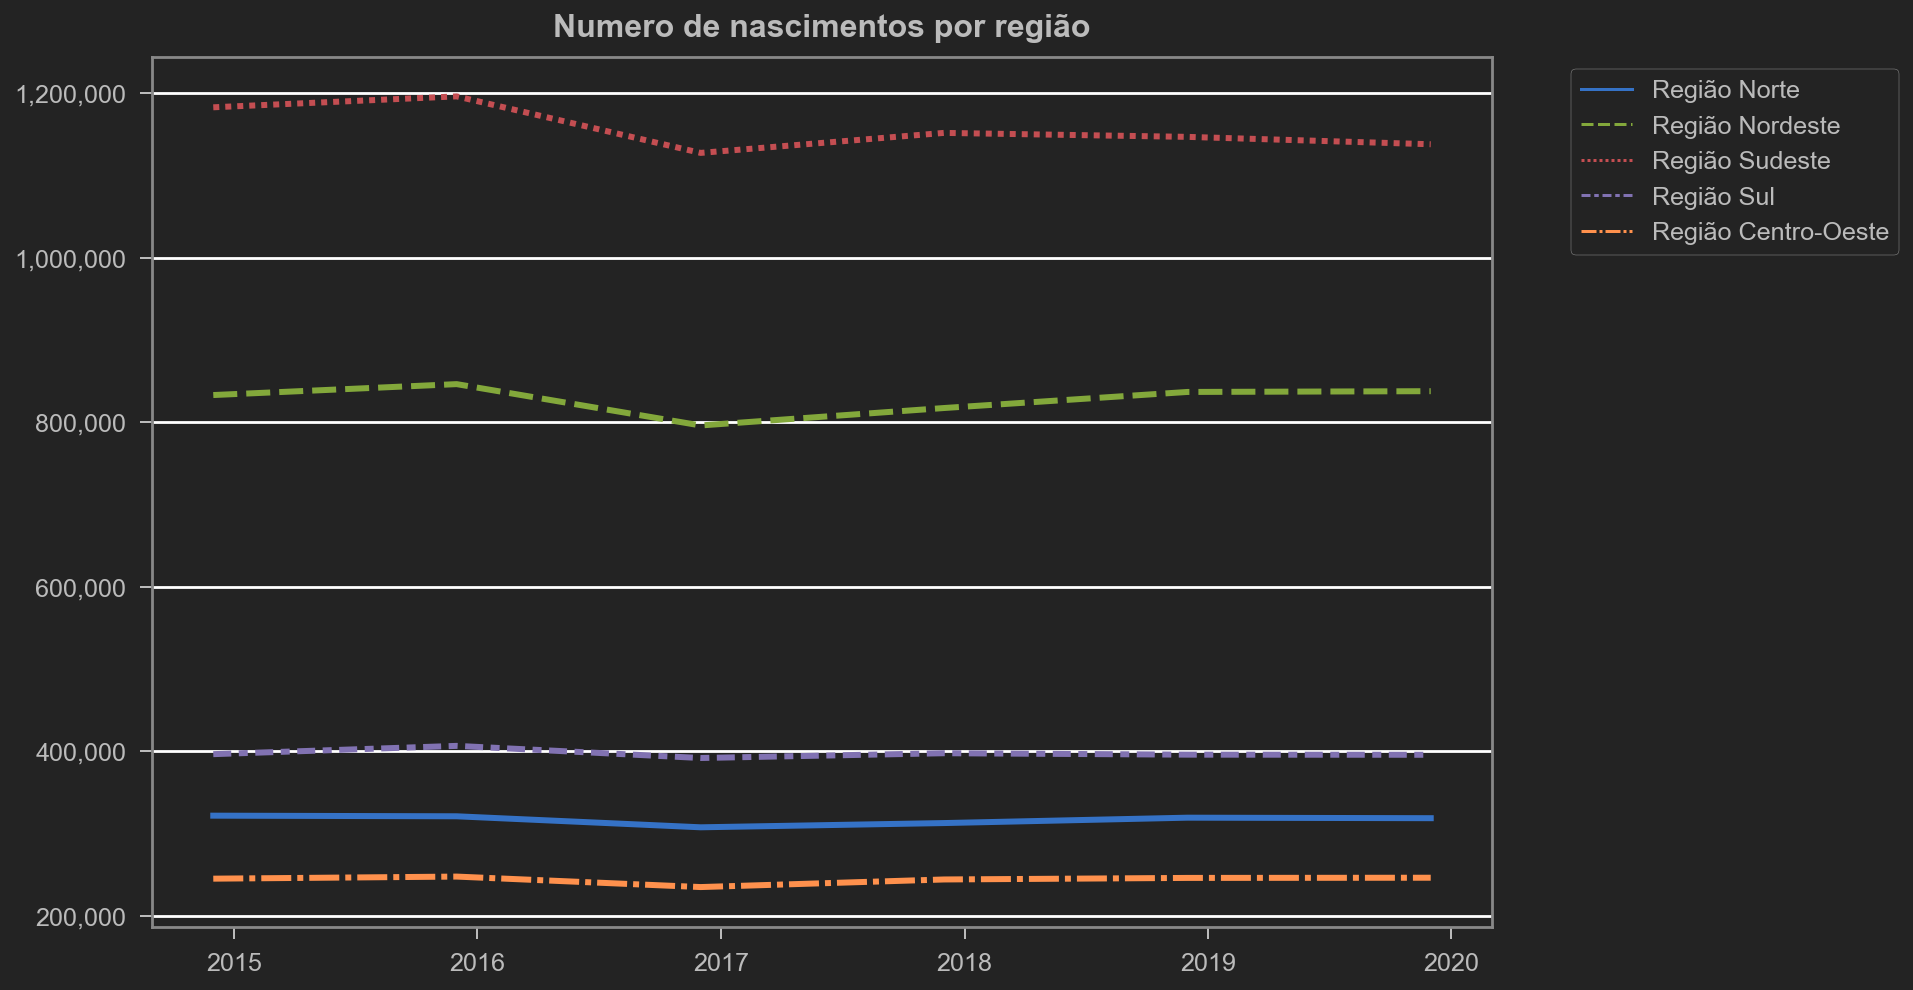

In [109]:
lineplot_nascimentos(nascimentos,regioes,'Numero de nascimentos por região')

Não houve mudança brusca no numero de nascimentos invalidadando entao a hipotese.  
Uma outra hipotese seria um corte orcamentário no programa de vacinação, não encontrei esses dados no Data SUS porem há uma materia da [Organização Reporter Brasil](reporterbrasil.org.br) com os seguintes dados:

![Orçamento do SUS ao longo da decada](https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Imagens/Organiza%C3%A7%C3%A3o%20Reporter%20Brasil.png)

Não houve queda na disponibilidae orcamentária, muito pelo contrário, houve um aumento de 2,3 bilhoes de reais sendo 1,2 bilhoes entre 2018 e 2019.  
Cabe lembar tambem que houve um aumento no numero de vacinas e muitas delas são importadas, o que aumenta o custo devido a diferença cambial.  
É possivel tambem que tenha ocorrido algum desabastecimento nas maternidades uma vez que as vacinas de Hepatite B e BCG são dadas logo após o nascimento, para confirmar podemos verificar as vacinas de Triplice Viral(um ano) e Polimeline(2 meses, 4 meses e 6 meses)

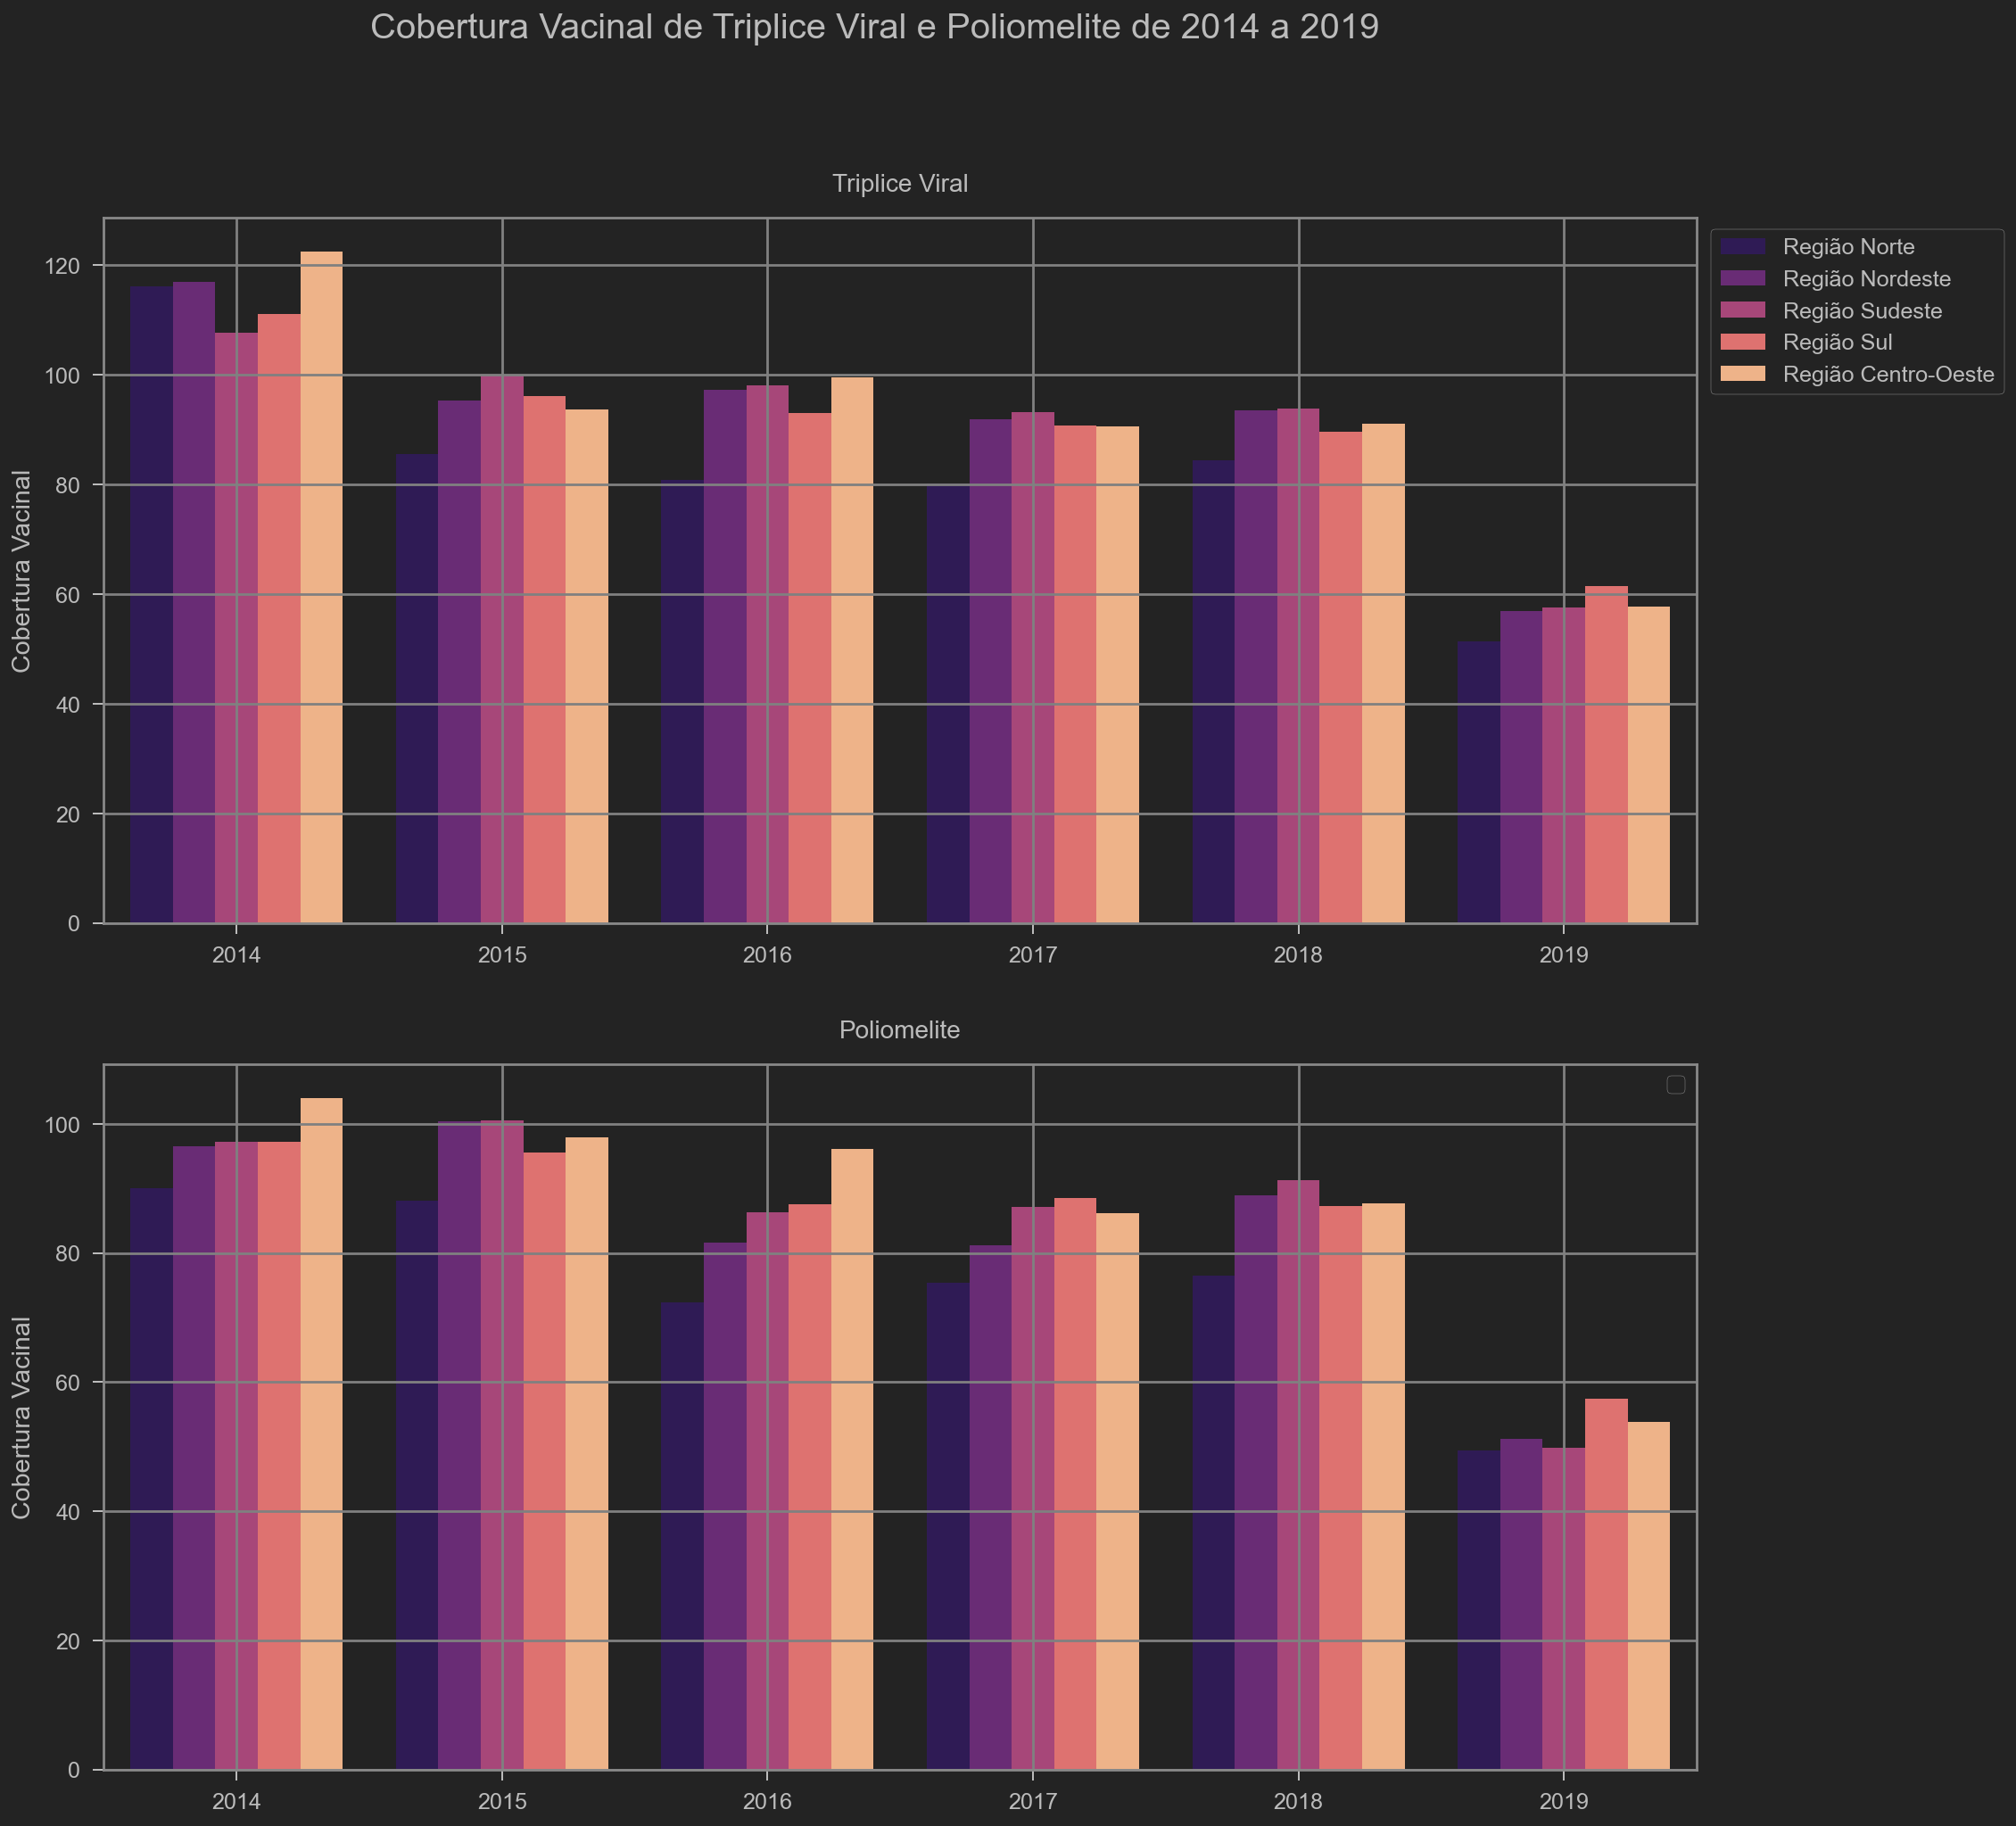

In [110]:
barplot_polioetriplice()

O mesmo comportamento de queda se observa.

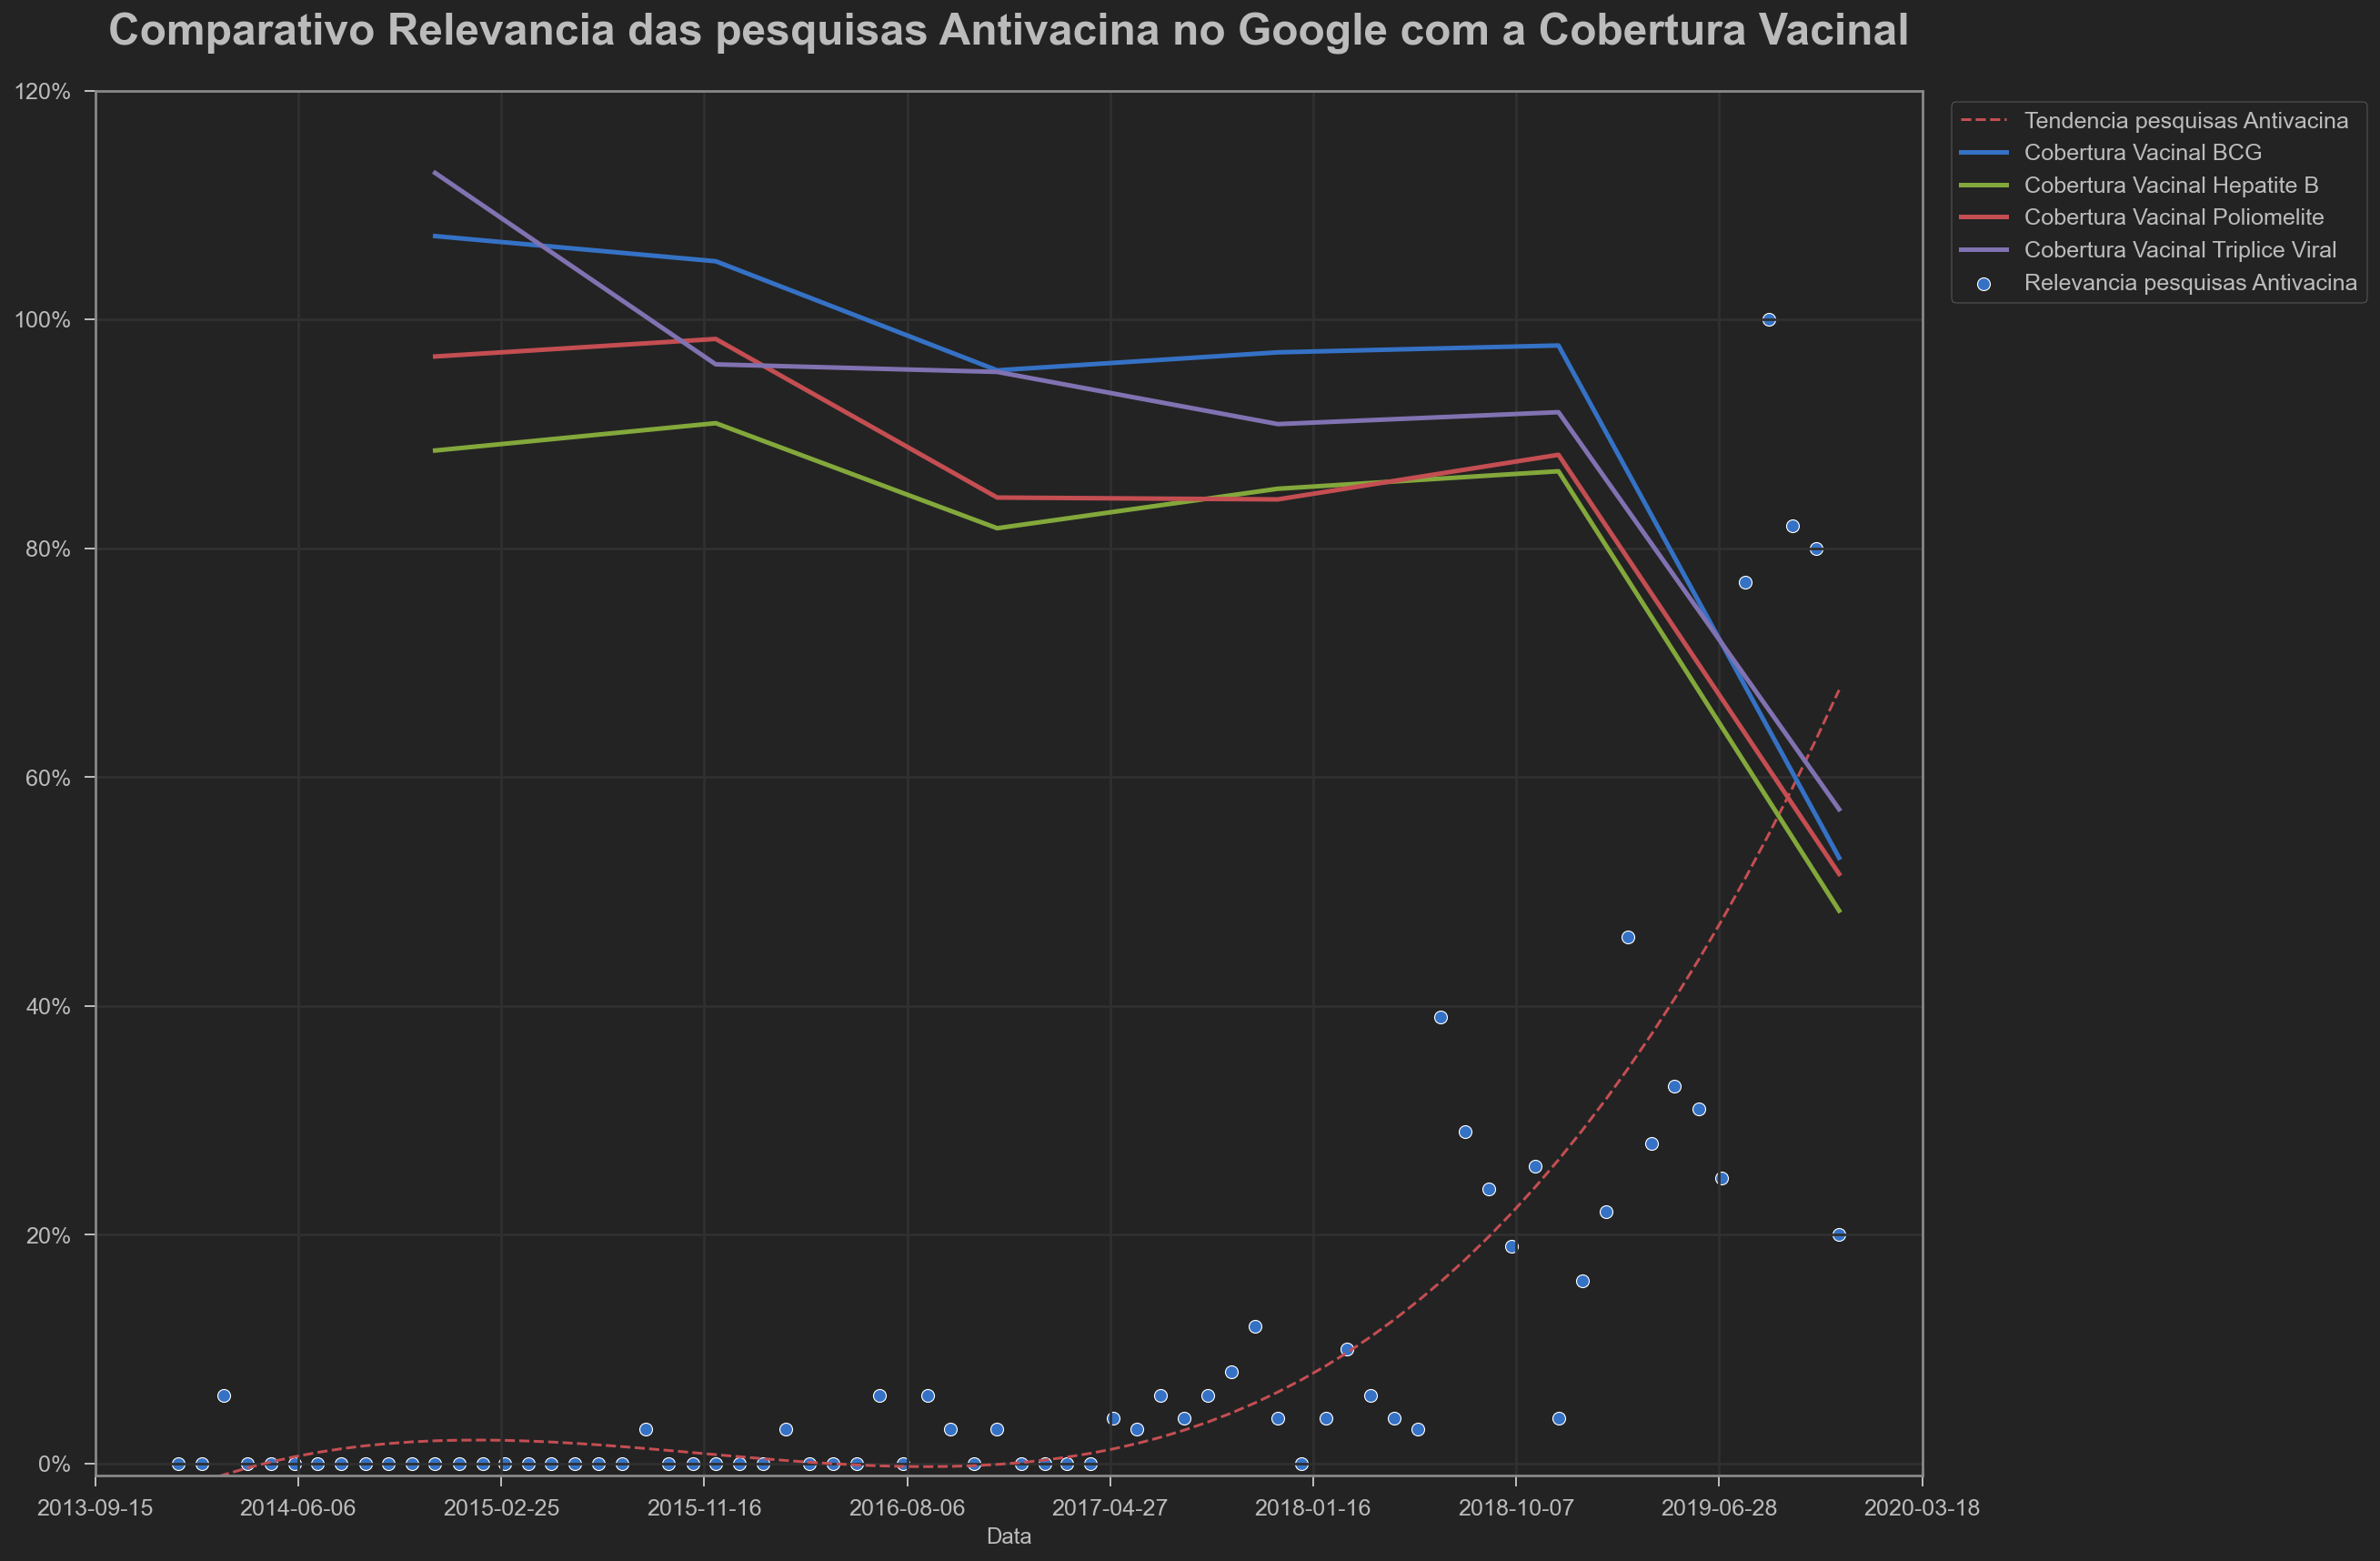

In [111]:
%config InlineBackend.figure_format ='retina'
compara_pesquisa_total_plus()

## Conclusão

Uma triste realidade ao constatar que o principal impacto visto na queda da cobertura vacinal esteja correlacionado aos grupos antivacinas.  De fevereiro de 2018 a janeiro de 2019, foram registrados 10.274 casos de sarampo no Brasil, uma doença altamente contagiosa porem facilmente evitável, muitos desses casos trazidos por refugiados [venezuelanos](https://www.bbc.com/portuguese/geral-47831375)( cujo o sistema de saude, assim como o pais, passa por uma profunda crise), unindo isso à baixa cobertura vacinal das crianças em 2019 tivemos como consegquencia [7.718 novos casos](http://associacaopaulistamedicina.org.br/noticia/brasil-tem-mais-de-7-mil-casos-de-sarampo-em-2020) até 8 de agosto de 2020. Isso foi só o impacto observado de apenas uma doença em um periodo de aproximadamente um ano, causa grande preocupação no dano que isso pode causar em breve, principalemnte das crianças vitimas das crenças e falta de informação dos pais estando fatalmente expostas a paralisia infantil, a poliomelite, que não tem cura mas é facilmente evitavel com a vacina, hepatite B e outras doenças que hoje ainda são raras graças ao sucesso das campanhas de vacinação passados.